In [3]:
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [6]:
# import packages

import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
CCTV = pd.read_csv('G:/Python/EDA/CCTV_data.csv',parse_dates=['단속일자'], encoding='cp949')

In [9]:
CCTV

,Unnamed: 0,단속장소,단속일자,단속시간,경도,위도,단속구분
0,3960,부산광역시 서구 공동어시장-2,2019-08-02,15:33,129.019488,35.095738,이동형CCTV
1,2543,부산광역시 서구 구덕로339번길 8부근,2020-07-14,16:39,129.015364,35.113964,이동형CCTV
2,2879,부산광역시 서구 구덕운동장회전교차로,2019-10-10,17:53,129.019488,35.095738,이동형CCTV
3,2965,부산광역시 서구 구덕운동장회전교차로,2019-10-11,10:07,129.019488,35.095738,이동형CCTV
4,2969,부산광역시 서구 구덕운동장회전교차로,2019-10-11,14:04,129.019488,35.095738,이동형CCTV
...,...,...,...,...,...,...,...
23978,3349,부산광역시 서구 해오름아파트 주변-4,2020-07-25,14:48,129.019488,35.095738,이동형CCTV
23979,3357,부산광역시 서구 해오름아파트 주변-4,2020-07-25,17:26,129.019488,35.095738,이동형CCTV
23980,3488,부산광역시 서구 해오름아파트 주변-4,2020-07-26,8:51,129.019488,35.095738,이동형CCTV
23981,3510,부산광역시 서구 해오름아파트 주변-4,2020-07-26,19:10,129.019488,35.095738,이동형CCTV


In [10]:
CCTV['단속일자']

0       2019-08-02
1       2020-07-14
2       2019-10-10
3       2019-10-11
4       2019-10-11
           ...    
23978   2020-07-25
23979   2020-07-25
23980   2020-07-26
23981   2020-07-26
23982   2020-08-01
Name: 단속일자, Length: 23983, dtype: datetime64[ns]

In [11]:
m = CCTV.groupby(CCTV['단속일자'].dt.strftime("%m")).count() #단속일자 년월일 데이터를 월별로 그룹화하여 카운트
m2 = m.iloc[:,[0]] #1열만 추출하여 m2저장
m2 = m2.reset_index() #인덱스 리셋
m2

,단속일자,Unnamed: 0
0,01,2412
1,02,2309
2,03,1839
3,04,1258
4,05,1395
5,06,2318
6,07,2433
7,08,1615
8,09,1079
9,10,2033


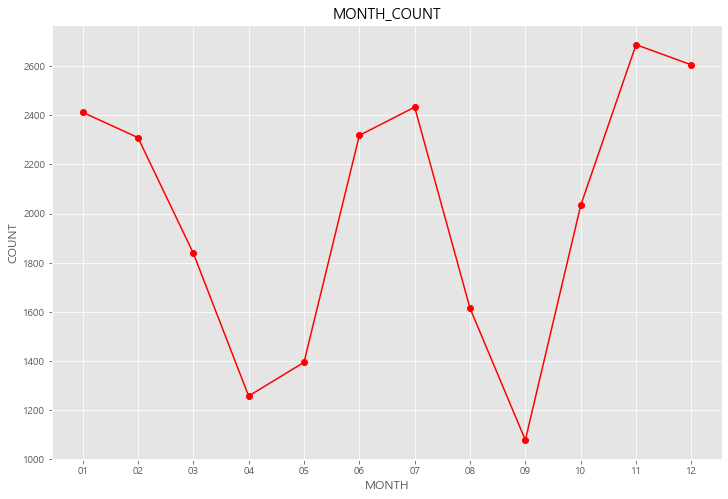

In [12]:
m2.columns = ['month','count'] # m2의 칼럼네임을 지정
plt.plot(m2['month'],m2['count'],color='red',marker='o', linestyle='solid') #월별 카운트 꺾은선 차트
plt.title('MONTH_COUNT') # 차트 제목
plt.xlabel('MONTH') # 가로축 제목
plt.ylabel('COUNT') # 세로축 제목
plt.show() #가로축을 월로 세로축을 카운트로 하여 꺾은선 그래프를 작성

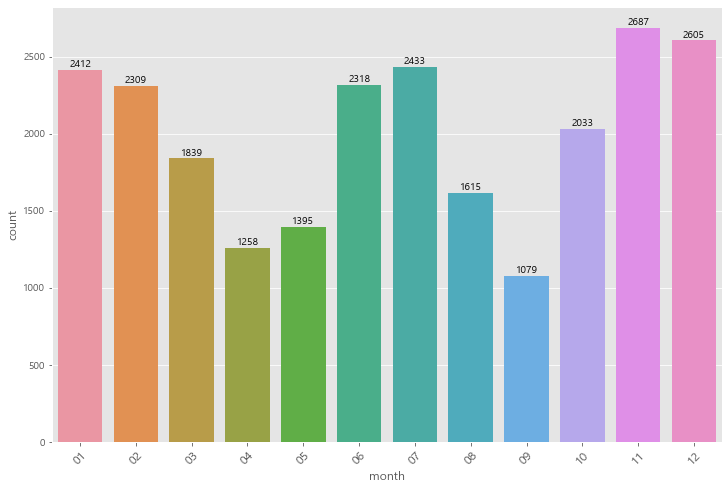

In [13]:
g = sns.barplot(data= m2,x= "month",y= "count", ci=None)
ax = g
#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=45)
plt.show() ##막대그래프

In [14]:
h = CCTV.단속시간.str.split(':').str[0] #단속시간의 시간:분 데이터형식을 분해 하여 시간만 추출
h

0        15
1        16
2        17
3        10
4        14
         ..
23978    14
23979    17
23980     8
23981    19
23982    18
Name: 단속시간, Length: 23983, dtype: object

In [15]:
h2 = CCTV.groupby(h).count() #단속시간 별로 카운트
h2 = h2.iloc[:,0] #1열만 추출
h2 = h2.reset_index() #인덱스 리셋

In [16]:
h2.columns = ['hour','count']
h2=h2.astype({'hour':int}) #hour열 int형으로 변환
h2.info()
h2 = h2.sort_values(by=['hour'],axis=0) #시간기준으로 오름차순으로 정렬
h2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hour    23 non-null     int32
 1   count   23 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 404.0 bytes


,hour,count
0,0,11
1,1,5
12,2,1
17,3,4
18,5,7
19,6,68
20,7,81
21,8,657
22,9,2330
2,10,2376


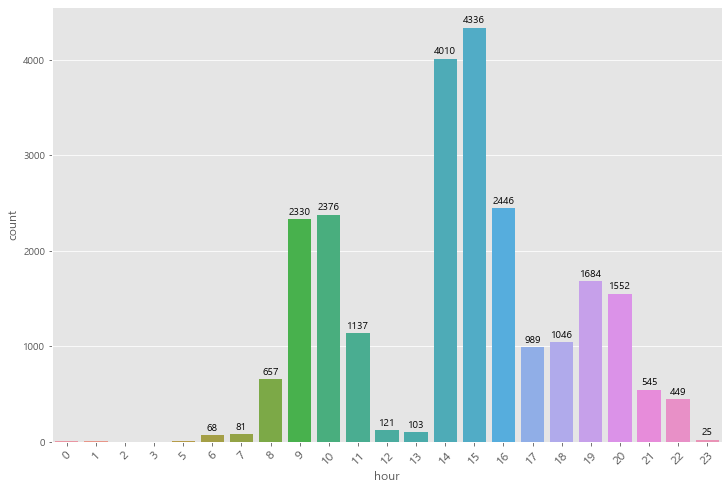

In [17]:
ho = sns.barplot(data= h2,x= "hour",y= "count", ci=None)
how = ho
#annotate axis = seaborn axis 
for p in how.patches: 
    how.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=45)
plt.show()

In [27]:
ct1 = CCTV.groupby('단속장소').count() #서구청의 단속장소를 그룹화하여 카운팅
ct2_decend = ct1.sort_values(by=['Unnamed: 0'],axis=0,ascending=False) # 카운팅 된것을 내림차순으로 정렬
ct3 = ct2_decend.head(10) # 상위 10 만 ct3저장
ct3.iloc[:,0] #1열만 출력

단속장소
부산광역시 서구 부산대학병원 응급실 앞    1852
부산광역시 서구 암남동 송도해변로       1343
부산광역시 서구 충무동 새벽시장         749
부산광역시 서구 동아대학교병원 주변       747
부산광역시 서구 암남동 송도해변         660
부산광역시 서구 케이블카 하부정류장1      564
부산광역시 서구 리인아파트 주변         527
부산광역시 서구 암남공원 입구 주변1      489
부산광역시 서구 동대신동브라운스톤앞       442
부산광역시 서구 서대신동 부산은행 앞      380
Name: Unnamed: 0, dtype: int64

In [24]:
is_ctfitter = CCTV['단속장소'] == '부산광역시 서구 부산대학병원 응급실 앞' #1위인 지역만을 추출
ctfitter = CCTV[is_ctfitter]
ctfitter


,Unnamed: 0,단속장소,단속일자,단속시간,경도,위도,단속구분
8002,2844,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:36,129.019488,35.095738,이동형CCTV
8003,2845,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:43,129.019488,35.095738,이동형CCTV
8004,2846,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:56,129.019488,35.095738,이동형CCTV
8005,2847,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:56,129.019488,35.095738,이동형CCTV
8006,2849,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,15:00,129.019488,35.095738,이동형CCTV
...,...,...,...,...,...,...,...
9849,3725,부산광역시 서구 부산대학병원 응급실 앞,2020-07-29,9:04,129.019488,35.095738,이동형CCTV
9850,3738,부산광역시 서구 부산대학병원 응급실 앞,2020-07-29,22:06,129.019488,35.095738,이동형CCTV
9851,3808,부산광역시 서구 부산대학병원 응급실 앞,2020-07-30,14:55,129.019488,35.095738,이동형CCTV
9852,3810,부산광역시 서구 부산대학병원 응급실 앞,2020-07-30,15:15,129.019488,35.095738,이동형CCTV


In [10]:
ctfitter['h'] = ctfitter.단속시간.str.split(':').str[0] #1위 지역의 단속시간 시간만 추출
ctfitter

,Unnamed: 0,단속장소,단속일자,단속시간,경도,위도,단속구분,h
8002,2844,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:36,129.019488,35.095738,이동형CCTV,14
8003,2845,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:43,129.019488,35.095738,이동형CCTV,14
8004,2846,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:56,129.019488,35.095738,이동형CCTV,14
8005,2847,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:56,129.019488,35.095738,이동형CCTV,14
8006,2849,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,15:00,129.019488,35.095738,이동형CCTV,15
...,...,...,...,...,...,...,...,...
9849,3725,부산광역시 서구 부산대학병원 응급실 앞,2020-07-29,9:04,129.019488,35.095738,이동형CCTV,9
9850,3738,부산광역시 서구 부산대학병원 응급실 앞,2020-07-29,22:06,129.019488,35.095738,이동형CCTV,22
9851,3808,부산광역시 서구 부산대학병원 응급실 앞,2020-07-30,14:55,129.019488,35.095738,이동형CCTV,14
9852,3810,부산광역시 서구 부산대학병원 응급실 앞,2020-07-30,15:15,129.019488,35.095738,이동형CCTV,15


In [11]:
ctfitter = ctfitter.astype({'h':int})
ctfitter

,Unnamed: 0,단속장소,단속일자,단속시간,경도,위도,단속구분,h
8002,2844,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:36,129.019488,35.095738,이동형CCTV,14
8003,2845,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:43,129.019488,35.095738,이동형CCTV,14
8004,2846,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:56,129.019488,35.095738,이동형CCTV,14
8005,2847,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,14:56,129.019488,35.095738,이동형CCTV,14
8006,2849,부산광역시 서구 부산대학병원 응급실 앞,2019-10-10,15:00,129.019488,35.095738,이동형CCTV,15
...,...,...,...,...,...,...,...,...
9849,3725,부산광역시 서구 부산대학병원 응급실 앞,2020-07-29,9:04,129.019488,35.095738,이동형CCTV,9
9850,3738,부산광역시 서구 부산대학병원 응급실 앞,2020-07-29,22:06,129.019488,35.095738,이동형CCTV,22
9851,3808,부산광역시 서구 부산대학병원 응급실 앞,2020-07-30,14:55,129.019488,35.095738,이동형CCTV,14
9852,3810,부산광역시 서구 부산대학병원 응급실 앞,2020-07-30,15:15,129.019488,35.095738,이동형CCTV,15


In [12]:
ctfitter2 = ctfitter.groupby(ctfitter['h']).count()
ctfitter2

,Unnamed: 0,단속장소,단속일자,단속시간,경도,위도,단속구분
h,,,,,,,
6,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1
8,64,64,64,64,64,64,64
9,117,117,117,117,117,117,117
10,124,124,124,124,124,124,124
11,63,63,63,63,63,63,63
14,150,150,150,150,150,150,150
15,137,137,137,137,137,137,137
16,144,144,144,144,144,144,144


In [19]:
ctfitter3 = ctfitter2.sort_values(by=['h'],axis=0)
ctfitter3 = ctfitter3.iloc[:,0]
ctfitter3 = ctfitter3.reset_index()
ctfitter3.columns = ['hour', 'count']

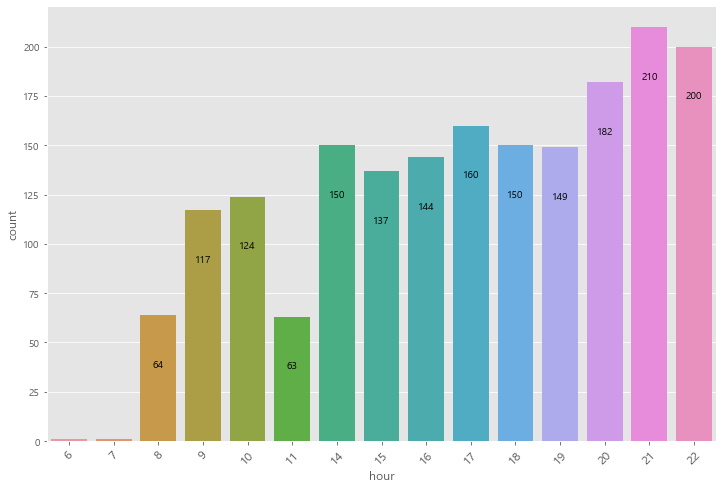

In [20]:
ctfitter4 = sns.barplot(data= ctfitter3,x= "hour",y= "count", ci=None)
ctfitter5 = ctfitter4
#annotate axis = seaborn axis 
for p in ctfitter5.patches: 
    ctfitter5.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=45)
plt.show()

In [22]:
m_ctfitter = ctfitter.groupby(ctfitter['단속일자'].dt.strftime("%m")).count() 
m_ctfitter2 = m_ctfitter.iloc[:,[0]] 
m_ctfitter2 = m_ctfitter2.reset_index() 
m_ctfitter2.columns = ['month','count']
m_ctfitter

,Unnamed: 0,단속장소,단속일자,단속시간,경도,위도,단속구분,h
단속일자,,,,,,,,
01,175,175,175,175,175,175,175,175
02,166,166,166,166,166,166,166,166
03,138,138,138,138,138,138,138,138
04,151,151,151,151,151,151,151,151
05,144,144,144,144,144,144,144,144
06,152,152,152,152,152,152,152,152
07,119,119,119,119,119,119,119,119
10,298,298,298,298,298,298,298,298
11,291,291,291,291,291,291,291,291


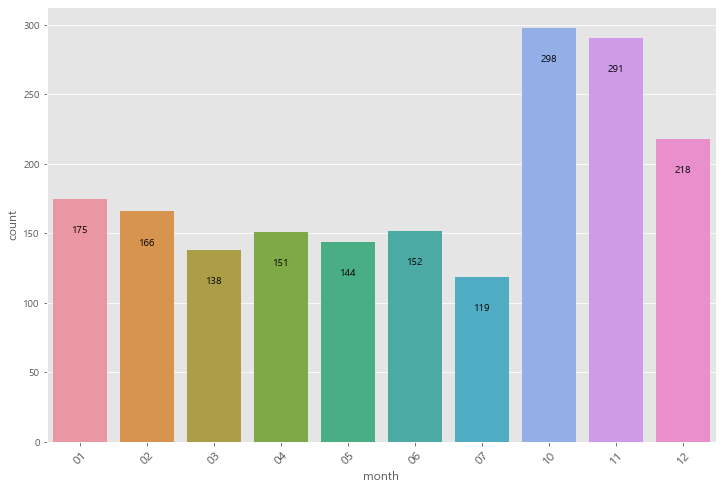

In [21]:
m_ctfitter3 = sns.barplot(data= m_ctfitter2,x= "month",y= "count", ci=None)
#annotate axis = seaborn axis 
for p in m_ctfitter3.patches: 
    m_ctfitter3.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=45)
plt.show()

## 2019년 8월 및 9월에 서구 부산대학병원 응급실앞 데이터가 없음!

In [15]:
CCTV.isnull().sum()
CCTV_sha = CCTV['단속장소'].shape
CCTV_sha

AttributeError: 'tuple' object has no attribute 'table'

In [10]:
dong_CCTV = CCTV[CCTV['단속장소'].str.contains('부산광역시 서구')] ## df[조건식]
dong_CCTV = dong_CCTV.reset_index()
dong_CCTV

,index,Unnamed: 0,단속장소,단속일자,단속시간,경도,위도,단속구분
0,0,3960,부산광역시 서구 공동어시장-2,2019-08-02,15:33,129.019488,35.095738,이동형CCTV
1,1,2543,부산광역시 서구 구덕로339번길 8부근,2020-07-14,16:39,129.015364,35.113964,이동형CCTV
2,2,2879,부산광역시 서구 구덕운동장회전교차로,2019-10-10,17:53,129.019488,35.095738,이동형CCTV
3,3,2965,부산광역시 서구 구덕운동장회전교차로,2019-10-11,10:07,129.019488,35.095738,이동형CCTV
4,4,2969,부산광역시 서구 구덕운동장회전교차로,2019-10-11,14:04,129.019488,35.095738,이동형CCTV
...,...,...,...,...,...,...,...,...
23978,23978,3349,부산광역시 서구 해오름아파트 주변-4,2020-07-25,14:48,129.019488,35.095738,이동형CCTV
23979,23979,3357,부산광역시 서구 해오름아파트 주변-4,2020-07-25,17:26,129.019488,35.095738,이동형CCTV
23980,23980,3488,부산광역시 서구 해오름아파트 주변-4,2020-07-26,8:51,129.019488,35.095738,이동형CCTV
23981,23981,3510,부산광역시 서구 해오름아파트 주변-4,2020-07-26,19:10,129.019488,35.095738,이동형CCTV


##**여기까찌**
